<a href="https://colab.research.google.com/github/Djaxis/MY-Python-Evolution/blob/main/Neural_Networks_Brice_De_Campos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170500096/170498071 [==============================] - 7s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [ ]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [ ]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7909 - accuracy: 0.3302 - val_loss: 1.3173 - val_accuracy: 0.5249
Epoch 2/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3492 - accuracy: 0.5118 - val_loss: 1.1773 - val_accuracy: 0.5778
Epoch 3/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1936 - accuracy: 0.5748 - val_loss: 1.0451 - val_accuracy: 0.6246
Epoch 4/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0804 - accuracy: 0.6157 - val_loss: 0.9974 - val_accuracy: 0.6473
Epoch 5/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0048 - accuracy: 0.6411 - val_loss: 0.9678 - val_accuracy: 0.6649
Epoch 6/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9219 - accuracy: 0.6711 - val_loss: 0.8975 - val_accuracy: 0.6893
Epoch 7/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8666 - accuracy: 0.6920 - val_loss: 0.8718 - val_ac

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[760  17  28  15  31  10   8   5  83  43]
 [ 20 811   2   9   2   1   8   0  28 119]
 [ 64   8 524  64 159  57  66  27  16  15]
 [ 23  12  50 512  97 145  86  32  10  33]
 [ 21   2  37  44 766  20  45  48  10   7]
 [ 12   6  28 211  80 538  47  60   8  10]
 [  5   6  24  62  69  12 802   5   4  11]
 [ 19   1  20  36  96  40  10 749   4  25]
 [ 57  23   8  17   6   4   4  10 835  36]
 [ 30  53   6  15  12   3   6  10  17 848]]


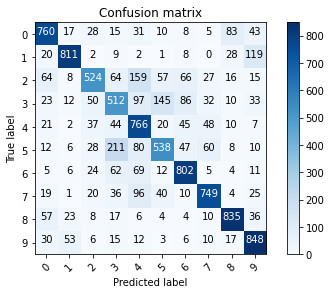

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools


predict_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm, list(range(10)))


In [ ]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

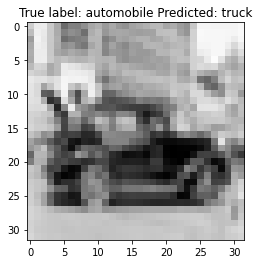

In [ ]:
# Show some misclassified examples
# TODO: add label names
misclassified = np.where(predict_test != y_test)[0]
i = np.random.choice(misclassified)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[predict_test[i]]));

In [ ]:
import tensorflow as tf

In [ ]:
# Load in the data
from sklearn.datasets import load_breast_cancer

In [ ]:
# load the data
data = load_breast_cancer()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
data.data.shape

(569, 30)

In [ ]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data.target.shape

(569,)

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

In [ ]:
N, D = X_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Coder notre modele

model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(D,)),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [ ]:
result = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

print('Train Score', model.evaluate(X_train, y_train))
print('Test Score', model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 2s 43ms/step - loss: 0.9095 - accuracy: 0.4289 - val_loss: 0.9536 - val_accuracy: 0.4628
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.7977 - accuracy: 0.5076 - val_loss: 0.8702 - val_accuracy: 0.5000
Epoch 3/100
12/12 [==============================] - 0s 16ms/step - loss: 0.7596 - accuracy: 0.5530 - val_loss: 0.7955 - val_accuracy: 0.5532
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.6962 - accuracy: 0.6404 - val_loss: 0.7313 - val_accuracy: 0.6011
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.6498 - accuracy: 0.6723 - val_loss: 0.6744 - val_accuracy: 0.6436
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5966 - accuracy: 0.7017 - val_loss: 0.6248 - val_accuracy: 0.7021
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5531 - accuracy: 0.7263 - val_loss: 0.5811 - val_accuracy: 0.7181
Epoch 8/100

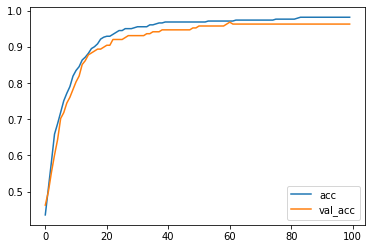

In [ ]:
import matplotlib.pyplot as plt


plt.plot(result.history['accuracy'], label='acc')
plt.plot(result.history['val_accuracy'], label='val_acc')
plt.legend()

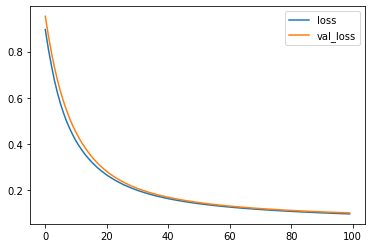

In [ ]:
# Plot what's returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
Predict = model.predict(X_test)

In [ ]:
Predict

array([[9.77745295e-01],
       [8.16985130e-01],
       [8.31191316e-02],
       [9.65584278e-01],
       [9.94873345e-01],
       [4.04671409e-05],
       [3.09683885e-02],
       [9.53421891e-01],
       [9.97064531e-01],
       [9.86523688e-01],
       [9.87546742e-01],
       [9.98341680e-01],
       [9.17043209e-01],
       [1.79557633e-02],
       [9.99243379e-01],
       [7.67985582e-01],
       [9.42068994e-01],
       [4.14213538e-01],
       [9.57114518e-01],
       [9.99177754e-01],
       [3.65992635e-02],
       [8.46163034e-01],
       [9.75635886e-01],
       [8.50822330e-01],
       [1.10318237e-04],
       [3.26890789e-04],
       [9.41281855e-01],
       [9.99606311e-01],
       [8.49166885e-03],
       [1.34031710e-04],
       [9.73375201e-01],
       [9.86442924e-01],
       [9.99476969e-01],
       [9.63854969e-01],
       [6.54476928e-03],
       [9.99069035e-01],
       [8.18324685e-01],
       [4.83683310e-04],
       [9.99521613e-01],
       [2.68086878e-04],


In [ ]:
# Let's now save our model to a file
model.save('linearclassifier.h5')

NameError: name 'model' is not defined